Import Library

In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

Load Data

In [2]:
df=pd.read_csv('bd_data.csv',delimiter=',')
df

,Year,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,GDP per capita (current US$),8.903524e+01,9.759527e+01,1.001221e+02,1.019014e+02,1.002211e+02,1.066466e+02,1.126654e+02,1.228706e+02,1.228476e+02,...,7.811536e+02,8.617584e+02,8.831050e+02,9.818399e+02,1.118854e+03,1.248453e+03,1.401621e+03,1.563914e+03,1.698350e+03,1.855740e+03
1,"Population, total",4.801350e+07,4.936284e+07,5.075216e+07,5.220201e+07,5.374172e+07,5.538511e+07,5.715765e+07,5.903425e+07,6.091845e+07,...,1.475754e+08,1.492738e+08,1.510078e+08,1.527647e+08,1.545202e+08,1.562563e+08,1.579708e+08,1.596706e+08,1.613560e+08,1.630462e+08
2,Agricultural land (sq. km),NaN,9.480000e+04,9.477000e+04,9.480000e+04,9.520000e+04,9.637000e+04,9.650000e+04,9.695000e+04,9.669000e+04,...,9.241000e+04,9.128000e+04,9.120000e+04,9.108000e+04,9.099000e+04,9.162240e+04,9.194210e+04,NaN,NaN,NaN
3,Population in largest city,5.079210e+05,5.435650e+05,6.025460e+05,6.679260e+05,7.405060e+05,8.207400e+05,9.097960e+05,1.008515e+06,1.118104e+06,...,1.473054e+07,1.526383e+07,1.581643e+07,1.638903e+07,1.698236e+07,1.759718e+07,1.823425e+07,1.889438e+07,1.957842e+07,2.028355e+07
4,CO2 emissions from solid fuel consumption (kt),5.892869e+03,5.804861e+03,6.189896e+03,6.681274e+03,6.523593e+03,6.171561e+03,5.331818e+03,5.236476e+03,5.680183e+03,...,3.076613e+03,2.838258e+03,3.424978e+03,3.751341e+03,3.509319e+03,8.613783e+03,6.226566e+03,NaN,NaN,NaN
5,Electric power consumption (kWh per capita),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.472634e+02,2.656394e+02,2.834622e+02,3.019612e+02,3.202042e+02,NaN,NaN,NaN,NaN,NaN
6,CO2 emissions (metric tons per capita),2.948050e-01,2.969237e-01,3.173356e-01,3.546738e-01,3.542015e-01,3.606411e-01,3.556161e-01,3.654313e-01,4.060770e-01,...,4.080838e-01,4.236092e-01,4.481279e-01,4.546643e-01,4.773360e-01,5.188509e-01,5.332988e-01,NaN,NaN,NaN


 Prepare data

In [3]:
df=df.transpose() #shift column to row

In [4]:
df.head()

,0,1,2,3,4,5,6
Year,GDP per capita (current US$),"Population, total",Agricultural land (sq. km),Population in largest city,CO2 emissions from solid fuel consumption (kt),Electric power consumption (kWh per capita),CO2 emissions (metric tons per capita)
1960,89.0352,4.80135e+07,NaN,507921,5892.87,NaN,0.294805
1961,97.5953,4.93628e+07,94800,543565,5804.86,NaN,0.296924
1962,100.122,5.07522e+07,94770,602546,6189.9,NaN,0.317336
1963,101.901,5.2202e+07,94800,667926,6681.27,NaN,0.354674


In [5]:
#Rename columns
df.columns=df.iloc[0]
new_col={
    'GDP per capita (current US$)':'GDP',
     'Population, total':'Population',
     'Agricultural land (sq. km)' :'Agricultural land',
    'Population in largest city':'Population in largest city',
     'CO2 emissions from solid fuel consumption (kt)':'CO2 from fuel consumption',
     'Electric power consumption (kWh per capita)':'Electric power consumption',
     'CO2 emissions (metric tons per capita)':'CO2'
}
df_new=df.rename(columns=new_col)
print(df_new.columns.values)

['GDP' 'Population' 'Agricultural land' 'Population in largest city'
 'CO2 from fuel consumption' 'Electric power consumption' 'CO2']


In [6]:
df_new['Year']=df_new.index
#df_new.style.hide_index()
df_new=df_new.drop('Year')
data=df_new.copy()
data.head()

Year,GDP,Population,Agricultural land,Population in largest city,CO2 from fuel consumption,Electric power consumption,CO2,Year
1960,89.0352,4.80135e+07,NaN,507921,5892.87,NaN,0.294805,1960
1961,97.5953,4.93628e+07,94800,543565,5804.86,NaN,0.296924,1961
1962,100.122,5.07522e+07,94770,602546,6189.9,NaN,0.317336,1962
1963,101.901,5.2202e+07,94800,667926,6681.27,NaN,0.354674,1963
1964,100.221,5.37417e+07,95200,740506,6523.59,NaN,0.354202,1964


In [175]:
#indexing

new_index=np.arange(0,len(data),1)
data=data.set_index(new_index)
data.head()

Year,GDP,Population,Agricultural land,Population in largest city,CO2 from fuel consumption,Electric power consumption,CO2,Year
0,89.035241,48013504.0,96409.008963,507921.0,5892.869,97.314646,0.294805,1960
1,97.595274,49362843.0,94800.000000,543565.0,5804.861,97.314646,0.296924,1961
2,100.122116,50752157.0,94770.000000,602546.0,6189.896,97.314646,0.317336,1962
3,101.901415,52202007.0,94800.000000,667926.0,6681.274,97.314646,0.354674,1963
4,100.221114,53741716.0,95200.000000,740506.0,6523.593,97.314646,0.354202,1964


# Data Analysis

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 8 columns):
GDP                           60 non-null object
Population                    60 non-null object
Agricultural land             56 non-null object
Population in largest city    60 non-null object
CO2 from fuel consumption     57 non-null object
Electric power consumption    44 non-null object
CO2                           57 non-null object
Year                          60 non-null object
dtypes: object(8)
memory usage: 4.2+ KB


Change datatype

In [35]:
data[['GDP','Population','Agricultural land','Population in largest city','CO2 from fuel consumption','Electric power consumption','CO2']]=data[['GDP','Population','Agricultural land','Population in largest city','CO2 from fuel consumption','Electric power consumption','CO2']].apply(pd.to_numeric)
data['Year']=data['Year'].astype('int32')

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 8 columns):
GDP                           60 non-null float64
Population                    60 non-null float64
Agricultural land             60 non-null float64
Population in largest city    60 non-null float64
CO2 from fuel consumption     60 non-null float64
Electric power consumption    60 non-null float64
CO2                           60 non-null float64
Year                          60 non-null int32
dtypes: float64(7), int32(1)
memory usage: 6.5 KB


Fill na value

In [37]:
data.isnull().sum()

Year
GDP                           0
Population                    0
Agricultural land             0
Population in largest city    0
CO2 from fuel consumption     0
Electric power consumption    0
CO2                           0
Year                          0
dtype: int64

In [38]:
data['Agricultural land']=data['Agricultural land'].fillna(data['Agricultural land'].mean())

In [39]:
data['CO2 from fuel consumption'].describe()

count      60.000000
mean     2347.307817
std      2303.728469
min        99.009000
25%       418.954750
50%      1331.121000
75%      3751.341000
max      8613.783000
Name: CO2 from fuel consumption, dtype: float64

In [40]:
data['CO2 from fuel consumption']=data['CO2 from fuel consumption'].fillna(3751.341000)

In [41]:
data['Electric power consumption'].describe()

count     60.000000
mean      97.314646
std       76.902588
min       10.656548
25%       36.826774
50%       97.314646
75%       99.137920
max      320.204158
Name: Electric power consumption, dtype: float64

In [42]:
data['Electric power consumption']=data['Electric power consumption'].fillna(data['Electric power consumption'].mean())

In [43]:
data[['CO2']].describe()

Year,CO2
count,60.000000
mean,0.255854
std,0.146542
min,0.052672
25%,0.123749
50%,0.252254
75%,0.361839
max,0.533299


In [44]:
data['CO2']=data['CO2'].fillna(0.533299)

In [176]:
data.isnull().sum()

Year
GDP                           0
Population                    0
Agricultural land             0
Population in largest city    0
CO2 from fuel consumption     0
Electric power consumption    0
CO2                           0
Year                          0
dtype: int64

In [46]:
data.describe()

Year,GDP,Population,Agricultural land,Population in largest city,CO2 from fuel consumption,Electric power consumption,CO2,Year
count,60.000000,6.000000e+01,60.000000,6.000000e+01,60.000000,60.000000,60.000000,60.000000
mean,433.206977,1.036261e+08,96409.008963,7.552792e+06,2347.307817,97.314646,0.255854,1989.500000
std,416.486734,3.638191e+07,3624.536838,5.944673e+06,2303.728469,76.902588,0.146542,17.464249
min,89.035241,4.801350e+07,90990.000000,5.079210e+05,99.009000,10.656548,0.052672,1960.000000
25%,140.898555,6.973528e+07,93467.500000,2.179866e+06,418.954750,36.826774,0.123749,1974.750000
50%,289.494815,1.019337e+08,96389.504482,6.396216e+06,1331.121000,97.314646,0.252254,1989.500000
75%,481.334425,1.374987e+08,99870.000000,1.200820e+07,3751.341000,99.137920,0.361839,2004.250000
max,1855.739824,1.630462e+08,104430.000000,2.028355e+07,8613.783000,320.204158,0.533299,2019.000000


Data Visulization

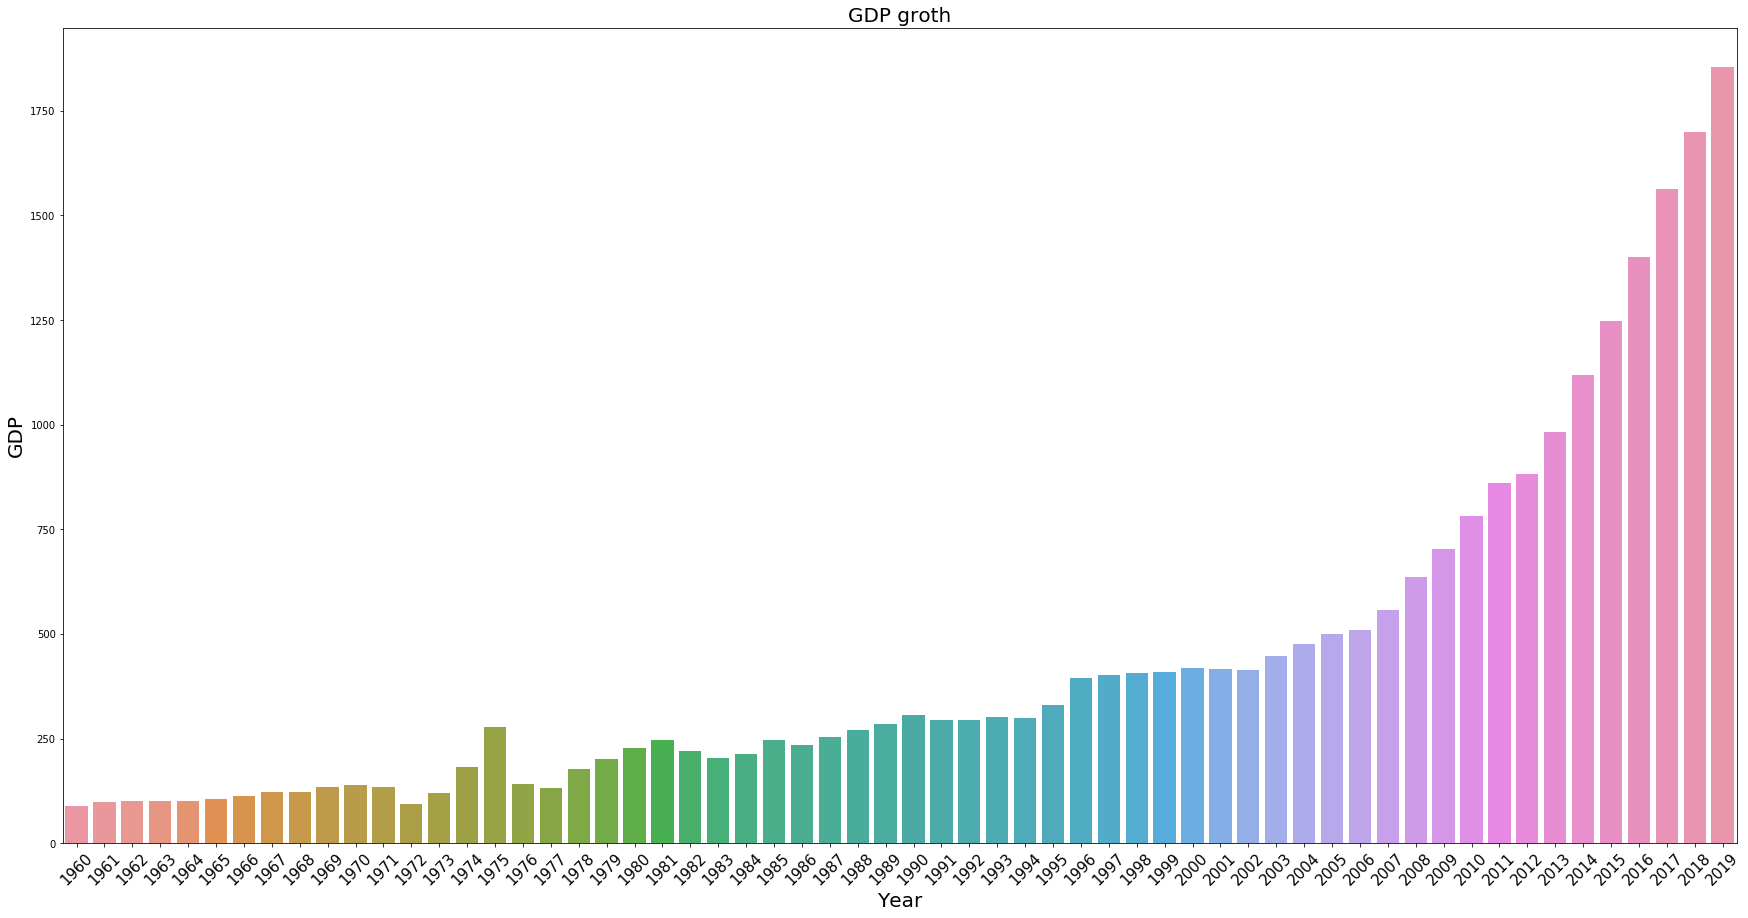

In [47]:
plt.figure(figsize=(30,15))
plt.xlabel('Year',fontsize=20)
plt.ylabel('GDP',fontsize=20)
plt.title("GDP groth",fontsize=20)
plt.xticks(rotation=45,fontsize=15)
sns.barplot(x=data['Year'],y=data['GDP'])

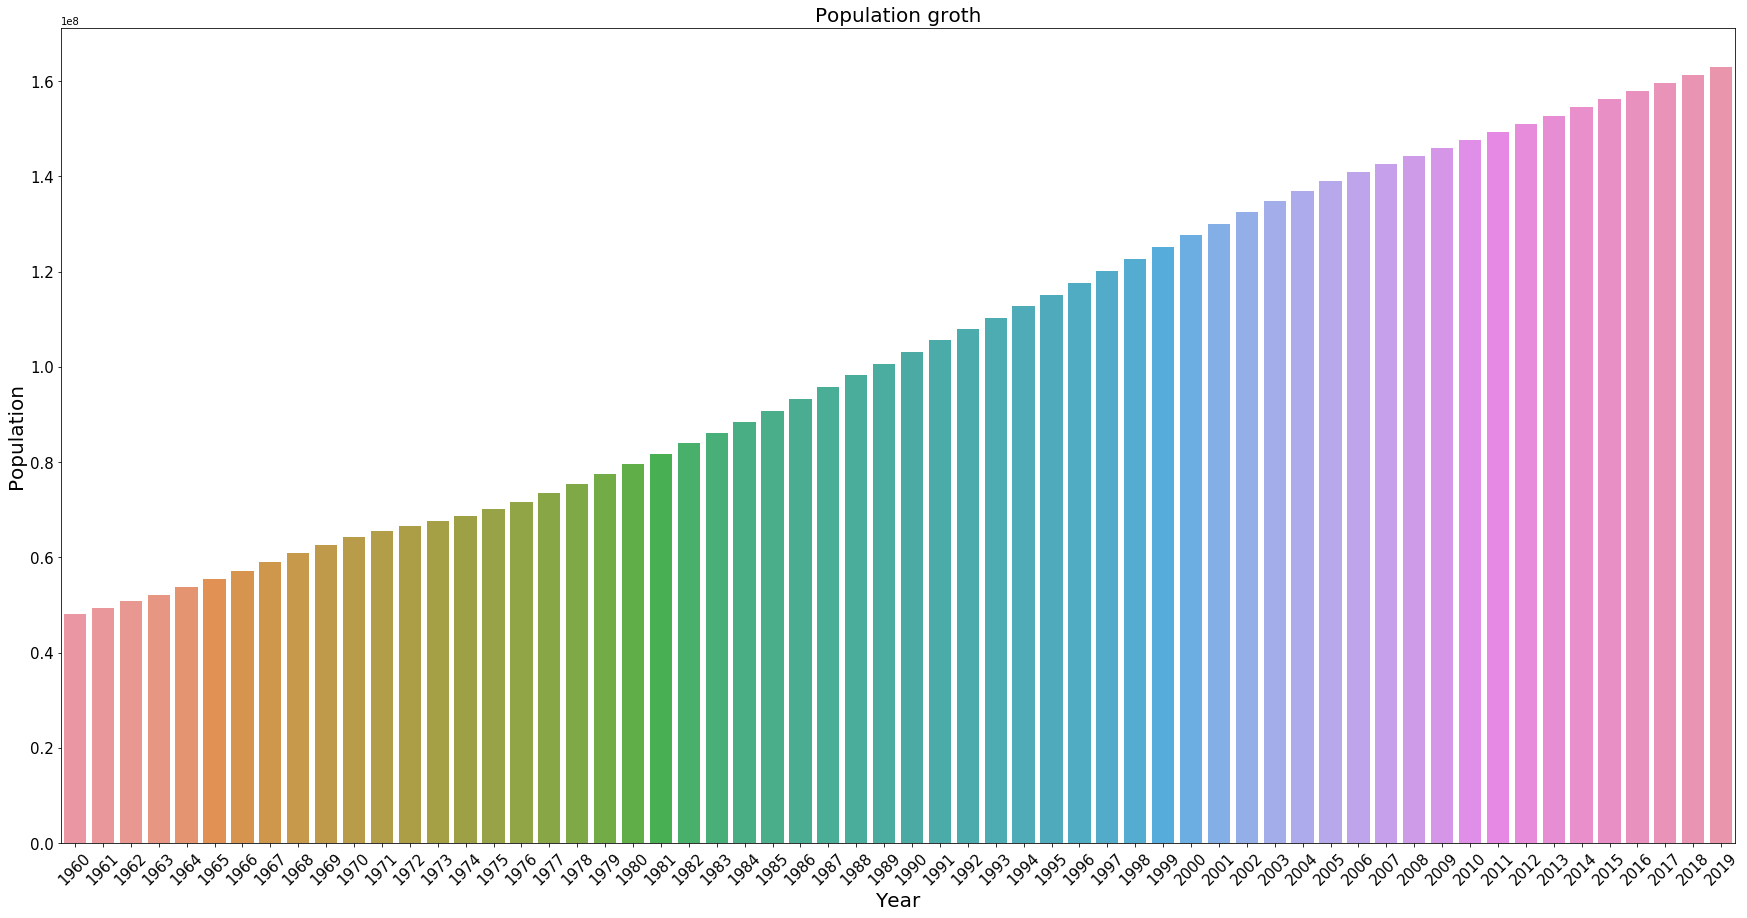

In [48]:
plt.figure(figsize=(30,15))
plt.xlabel('Year',fontsize=20)
plt.ylabel('Population',fontsize=20)
plt.title("Population groth",fontsize=20)
plt.xticks(rotation=45,fontsize=15)
plt.yticks(fontsize=15)
sns.barplot(x=data['Year'],y=data['Population'])
plt.show()

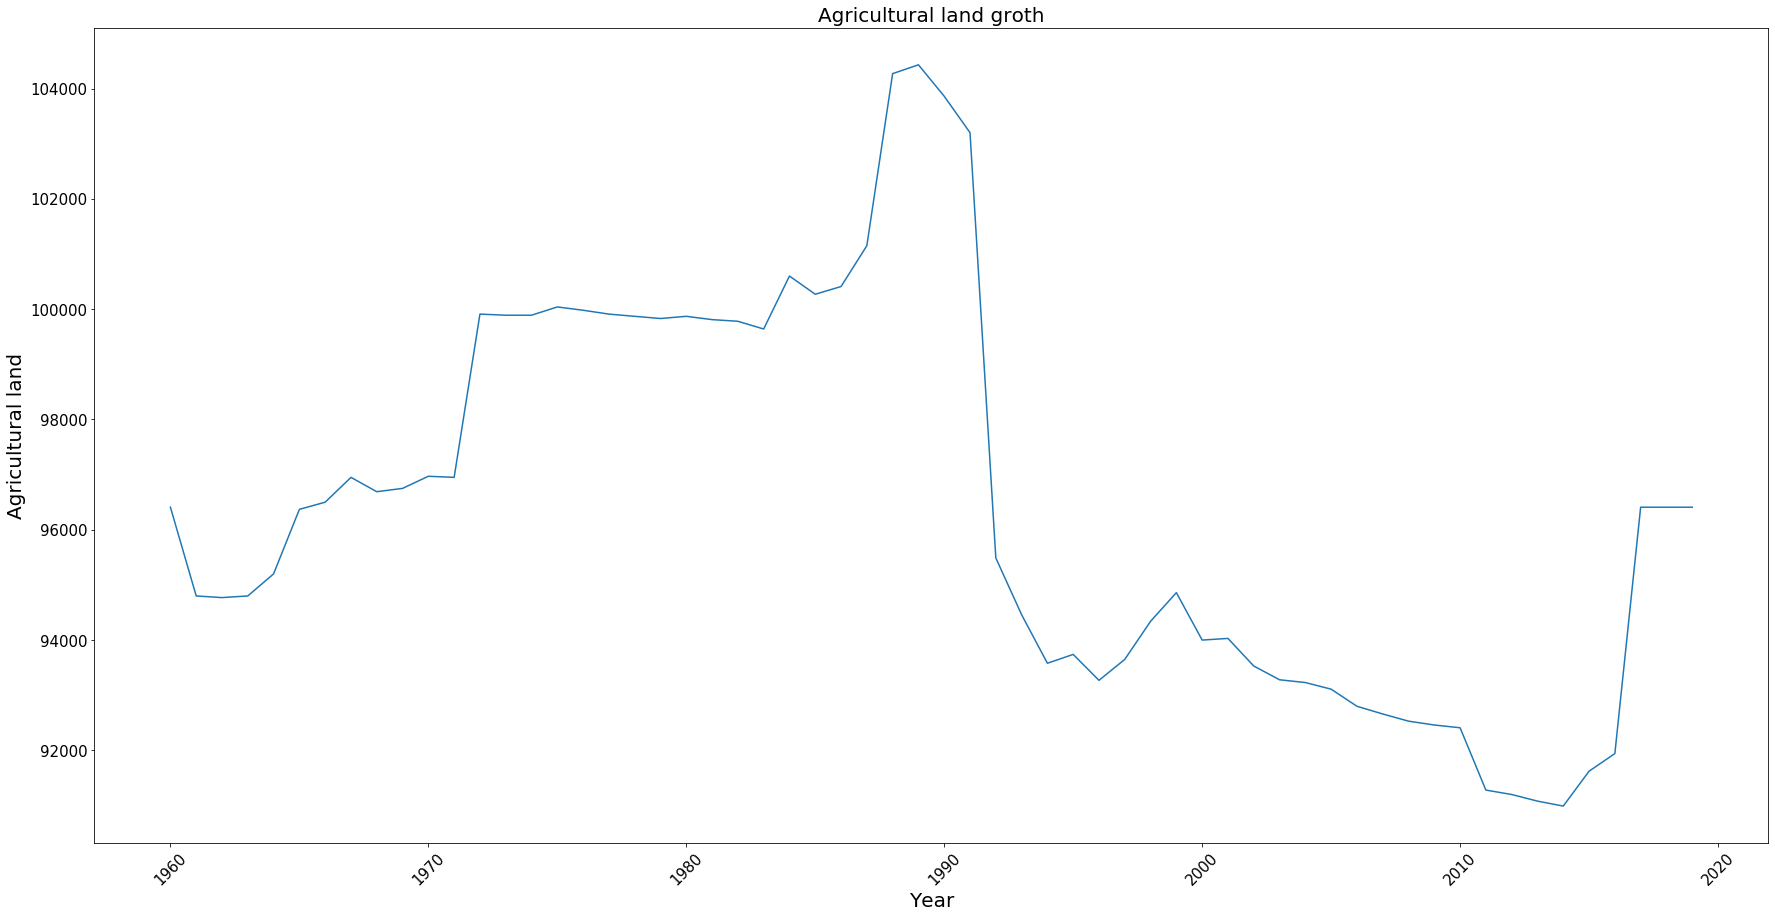

In [49]:

plt.figure(figsize=(30,15))
plt.xlabel('Year',fontsize=20)
plt.ylabel('Agricultural land',fontsize=20)
plt.title("Agricultural land groth",fontsize=20)
plt.xticks(rotation=45,fontsize=15)
plt.yticks(fontsize=15)
sns.lineplot(x=data['Year'],y=data['Agricultural land'])
plt.show()

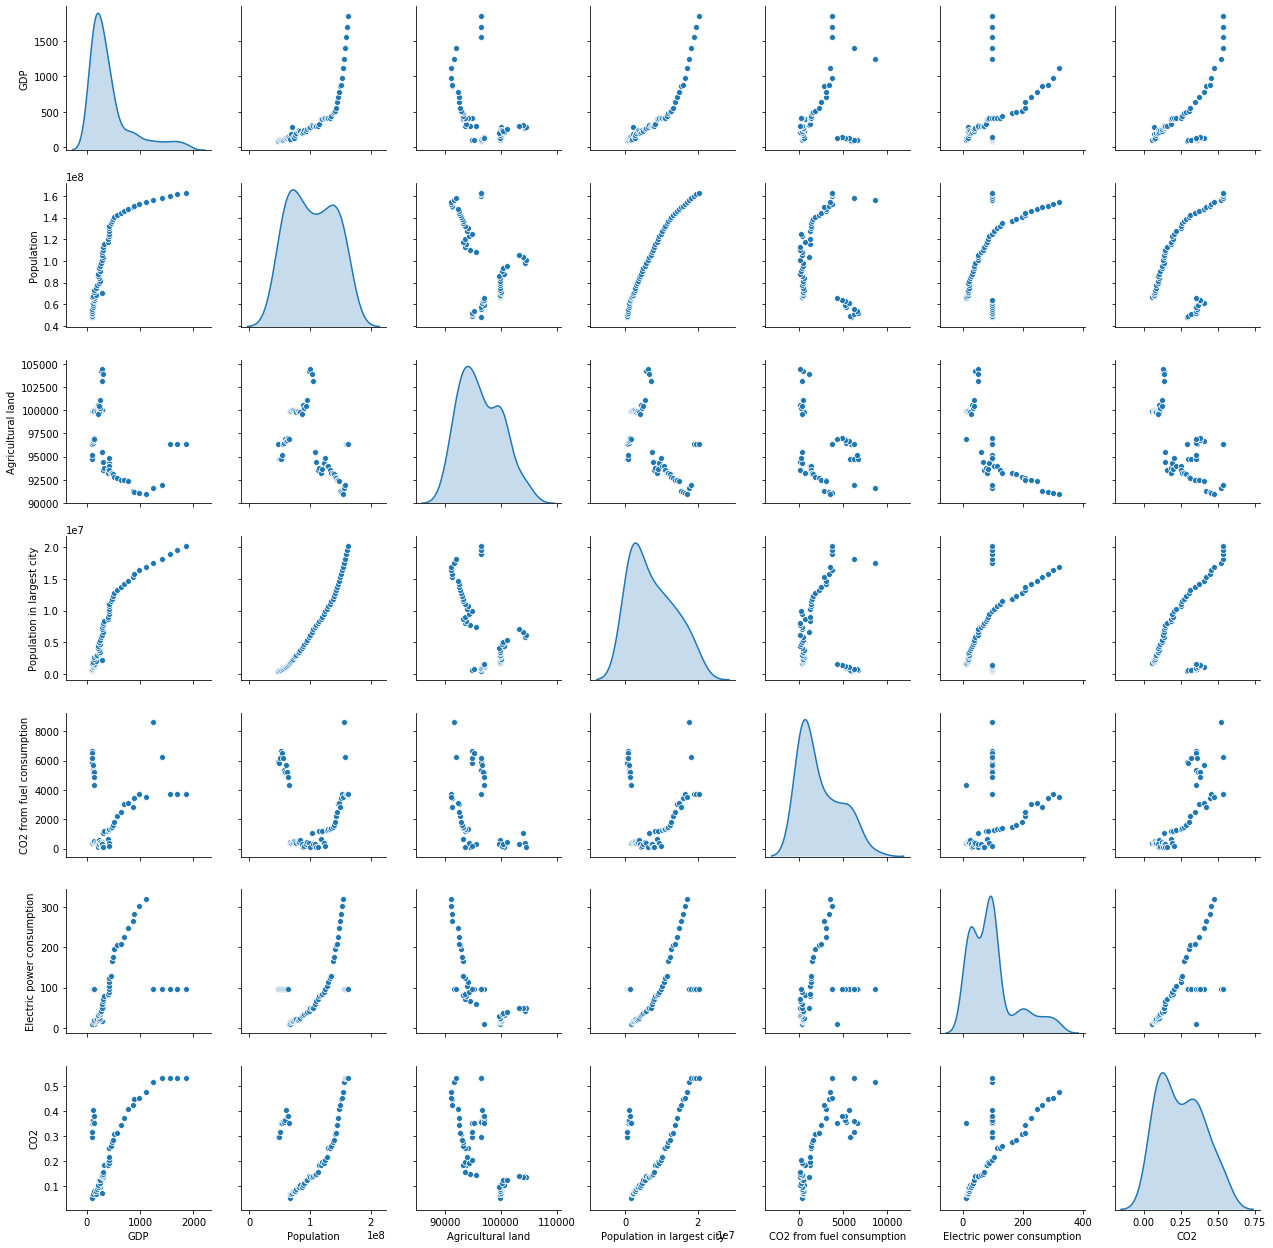

In [50]:
sns.pairplot(data[['GDP','Population','Agricultural land','Population in largest city','CO2 from fuel consumption','Electric power consumption','CO2']],diag_kind='kde')


# Model

Data Normalization

In [57]:
# y_mean=data['CO2'].mean()
# y_std=data['CO2'].std()
# def convert_label_value(pred):
#     return int(pred*y_std+y_mean)
# print(convert_label_value(0.419551))

0


select features and labels

In [120]:
# x=nom_data.drop('CO2',axis=1)
# y=nom_data['CO2']
# #y.head()
x=data.drop(columns=['CO2'],axis=1)
y=data['CO2']

In [121]:
# Tensorflow needed numaric value for the feature and label
x_arr=x.values
y_arr=y.values

In [122]:
print(x_arr.shape)
print(y_arr.shape)

(60, 7)
(60,)


train and split

In [123]:
x_train,x_test,y_train,y_test=train_test_split(x_arr,y_arr,test_size=0.1,random_state=0)

In [124]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(54, 7) (54,)
(6, 7) (6,)


Create Ml model

In [131]:
accuracies = {}

In [134]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(x_train,y_train)
acc = model.score(x_test,y_test)*100
accuracies['linear_model'] = acc
print("Accuracy --> ",acc)

Accuracy -->  90.95736293082385


In [136]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=1000)
model.fit(x_train, y_train)
acc = model.score(x_test,y_test)*100
accuracies['Random Forest'] = acc
print("Accuracy --> ",acc)

Accuracy -->  99.56448514943511


In [141]:
y_pred=model.predict(x_test)

In [142]:
pd.DataFrame(np.c_[y_test,y_pred],columns=['Actual Value','Predict Value'])

,Actual Value,Predict Value
0,0.123010,0.113826
1,0.183462,0.168002
2,0.533299,0.524995
3,0.137961,0.128410
4,0.352142,0.347050
5,0.317336,0.323144


In [143]:
model.score(x_test,y_test)

0.9956448514943511

In [151]:

test_data=np.array([97.595274,49362843.0,94800.0,543565.0,5804.861,97.314646,1961])
print(model.predict(test_data.reshape(1,7)))

[0.30809943]


which Almost The same

In [173]:
#2nd test
test_data=np.array([1548.453398,176256276.0,93622.402340,18597177.0,9613.783,520.204158,2030])
val=model.predict(test_data.reshape(1,7))

print(val[0],'Metric tons per capita')

0.505617311444245 Metric tons per capita


Save Model

In [177]:
import joblib
joblib.dump(model, "Predict_Co2.pkl")

['Predict_Co2.pkl']